[View in Colaboratory](https://colab.research.google.com/github/saranyamandava/Lambda-School-DataScience/blob/master/Copy_of_Week6_Logistic_Regression_Library_Coding_Challenge_3.ipynb)

# Separating classes with Logistic Regression

## Logistic Regression classifies

Linear regression makes a prediction: if `y = mx + b`. Logistic regression produces a probability, an estimate that `y` is either `0` or `1`.

Consider the following dataset:

In [0]:
# LAMBDA SCHOOL
# 
# MACHINE LEARNING
#
# MIT LICENSE

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.DataFrame()
data['x'] = np.array([3,0,5,2,1,0,0,5,6,4,1])
data['y'] = np.array([1,0,1,0,0,0,0,1,1,0,0])
print(data)

    x  y
0   3  1
1   0  0
2   5  1
3   2  0
4   1  0
5   0  0
6   0  0
7   5  1
8   6  1
9   4  0
10  1  0


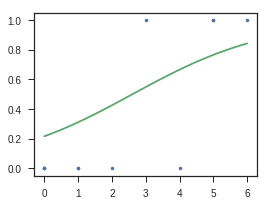

In [0]:
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression()
regr.fit(data['x'].values.reshape(-1,1),data['y'].ravel())
y_hat = regr.predict(data['x'].values.reshape(-1,1))

plt.figure(figsize=(4,3))
plt.plot(data['x'],data['y'],'.')

smooth_x = np.linspace(0,6,30)
p = regr.coef_[0] * smooth_x + regr.intercept_
p = 1/(1+np.exp(-p))
plt.plot(smooth_x,p,'g');

In the above, the blue dots are the samples, and the green is the line of probability predicted by the logistic regression. When the logistic regression estimate `p(x) < 0.5, `y = 0`. When `p(x) >= 0.5`, `y = 1`. The next graph shows the prediction of the estimator: 

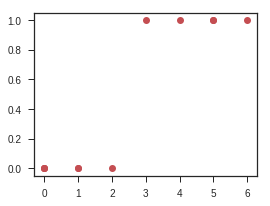

In [0]:
plt.figure(figsize=(4,3))
plt.plot(data['x'],regr.predict(data['x'].values.reshape(-1,1)),'or');

### Challenge

Load the Motor Trend cars dataset at `https://www.dropbox.com/s/itcg6srrzn5u3fj/mtcars.csv?raw=1` and use the `fit` and `predict` functions of `sklearn.linear_model.LogisticRegression` to predict the two binomial columns from that dataset: `vs` and `am`. You choose which feature columns to use.

### Stretch goal

After fitting the model to predict `vs` and `am` on your chosen features, duplicate the above code that draws the sigmoid prediction function using `smooth_x`, `coef_`, and `intercept_`.

In [0]:
data1 = pd.read_csv("https://raw.githubusercontent.com/saranyamandava/ML-Sprint-Challenges/master/mt%20cars.csv")
data1.head()


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


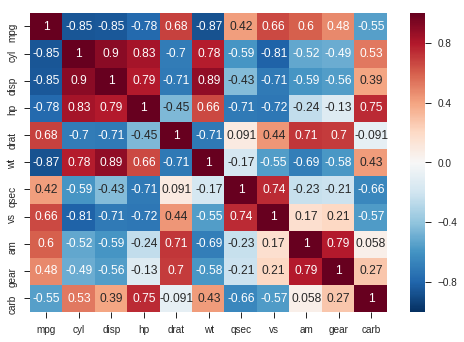

In [0]:
import seaborn as sns
sns.set(style='ticks', color_codes=True)
sns.heatmap(data1.corr(), linecolor='white', annot=True)
plt.show()

from the above heatmap, we can observe am is strongly correlated with gear. vs is neagativley correlated with cyl

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0,0.5,'am')

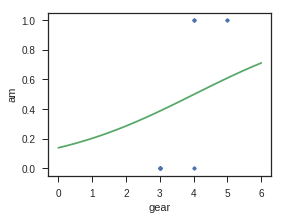

In [0]:
gear = data1['gear']
am = data1['am']
regr = LogisticRegression()
regr.fit(gear.values.reshape(-1,1),am.values.reshape(-1,1))
y_hat = regr.predict(gear.values.reshape(-1,1))
print (y_hat)

plt.figure(figsize=(4,3))
plt.plot(gear,am,'.')

smooth_x = np.linspace(0,6,30)
p = regr.coef_[0] * smooth_x + regr.intercept_
p = 1/(1+np.exp(-p))
plt.plot(smooth_x,p,'g');
plt.xlabel("gear")
plt.ylabel("am")
#plt.plot(gear,y_hat,'.r')

[0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


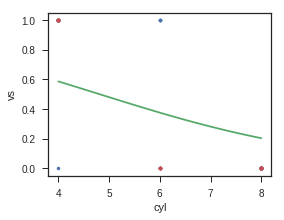

In [0]:
vs = data1['vs']
cyl = data1['cyl']
regr = LogisticRegression()
regr.fit(cyl.values.reshape(-1,1),vs.values.reshape(-1,1))
y_hat = regr.predict(cyl.values.reshape(-1,1))
print (y_hat)

plt.figure(figsize=(4,3))
plt.plot(cyl,vs,'.')

smooth_x = np.linspace(cyl.min(),cyl.max(),30)
p = regr.coef_[0] * smooth_x + regr.intercept_
p = 1/(1+np.exp(-p))
plt.plot(smooth_x,p,'g');
plt.xlabel("cyl")
plt.ylabel("vs")
plt.plot(cyl,y_hat,'.r')